# Clustering on the San Francisco Airport Dataset

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('air-traffic-passenger-statistics.csv') #Reading data from csv file

In [3]:
df

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090
...,...,...,...,...,...,...,...,...,...,...,...,...
18880,201806,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50
18881,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868
18882,201806,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664
18883,201806,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804


## EDA-Exploratory Data Analysis

In [4]:
df.head() #Show the first 5 rows in the data frame

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [5]:
df.sample(10) #Show 10 random rows

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
12982,201411,Etihad Airways,EY,Etihad Airways,EY,International,Middle East,Enplaned,Other,International,A,3217
18732,201806,Air Pacific Limited dba Fiji Airways,FJ,Air Pacific Limited dba Fiji Airways,FJ,International,Australia / Oceania,Enplaned,Other,International,G,2683
6939,201006,Southwest Airlines,WN,Southwest Airlines,WN,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,124
2843,200707,United Airlines,UA,United Airlines,UA,Domestic,US,Deplaned,Other,Terminal 1,B,71437
13161,201412,United Airlines,UA,United Airlines,UA,International,Canada,Deplaned,Other,International,G,1731
17312,201708,SkyWest Airlines,OO,United Airlines,UA,International,Canada,Deplaned,Other,International,G,1403
5054,200902,Delta Air Lines,DL,Delta Air Lines,DL,Domestic,US,Enplaned,Other,Terminal 1,C,45497
14250,201509,United Airlines,UA,United Airlines,UA,International,Canada,Thru / Transit,Other,International,G,98
10177,201210,SkyWest Airlines,OO,United Airlines - Pre 07/01/2013,UA,Domestic,US,Enplaned,Other,Terminal 1,B,98322
17752,201711,Philippine Airlines,PR,Philippine Airlines,PR,International,Asia,Enplaned,Other,International,A,10512


In [6]:
df.info() #Give information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [7]:
df['Operating Airline'].value_counts() # how many flight information from which airline

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Xtra Airways                           2
Evergreen International Airlines       2
Pacific Aviation                       2
Icelandair EHF                         2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

C:\Users\fa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


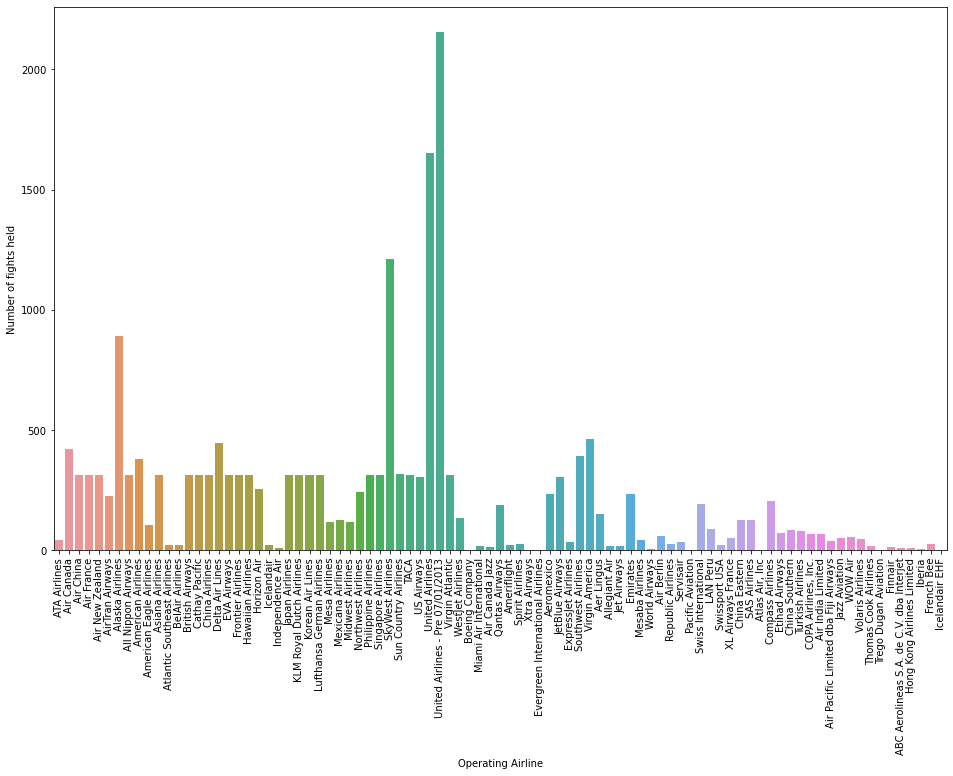

In [8]:
plt.figure(figsize = (16,10))
sns.countplot(df['Operating Airline'])
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

C:\Users\fa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


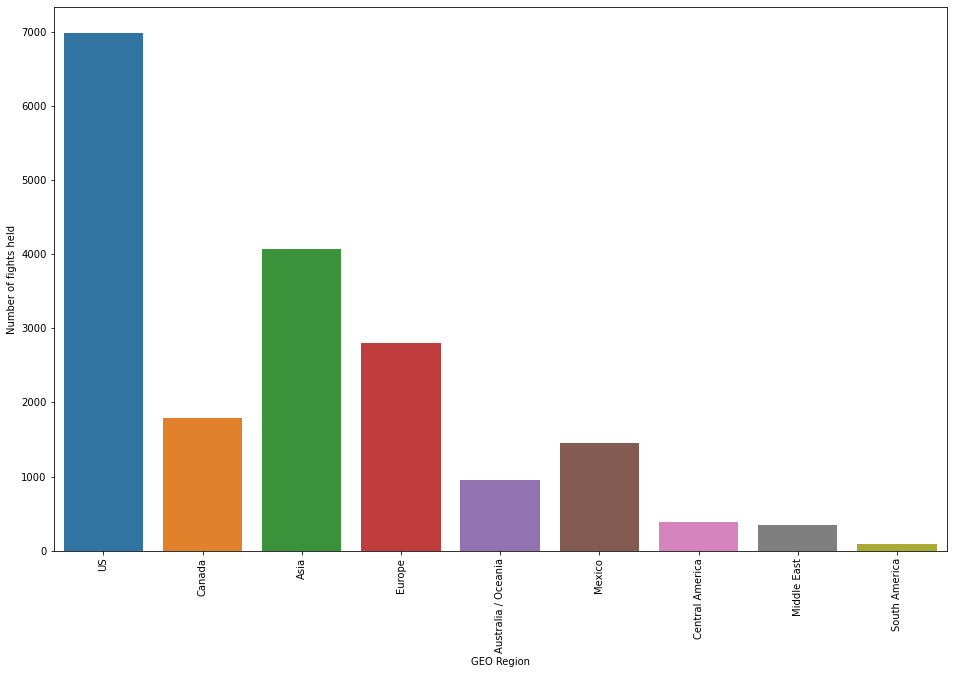

In [9]:
plt.figure(figsize = (16,10))
sns.countplot(df["GEO Region"])
plt.xticks(rotation = 90)
plt.ylabel("Number of fights held")
plt.show()

## Data Preparation

In [10]:
#Find the total number of fliights for each airline
airline_count = df["Operating Airline"].value_counts()
airline_count.sort_index(inplace=True)
#Find the total number of passengers for each airline
passenger_count = df.groupby("Operating Airline").sum()["Passenger Count"]
passenger_count.sort_index(inplace=True)

In [11]:
airline_count 

ABC Aerolineas S.A. de C.V. dba Interjet      8
ATA Airlines                                 44
Aer Lingus                                  152
Aeromexico                                  234
Air Berlin                                   60
                                           ... 
WOW Air                                      56
WestJet Airlines                            135
World Airways                                 3
XL Airways France                            51
Xtra Airways                                  2
Name: Operating Airline, Length: 89, dtype: int64

In [12]:
passenger_count

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet      15585
ATA Airlines                                 384764
Aer Lingus                                   777691
Aeromexico                                  1672946
Air Berlin                                   235155
                                             ...   
WOW Air                                      295168
WestJet Airlines                             799801
World Airways                                   785
XL Airways France                            118961
Xtra Airways                                    146
Name: Passenger Count, Length: 89, dtype: int64

C:\Users\fa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


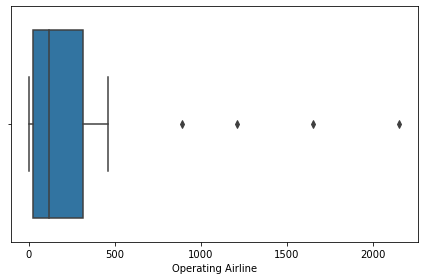

In [13]:
sns.boxplot(airline_count) # Show flight count as boxplot to see outliers
plt.tight_layout()

In [14]:
airline_count.sort_values(ascending = False, inplace = False)

United Airlines - Pre 07/01/2013    2154
United Airlines                     1653
SkyWest Airlines                    1212
Alaska Airlines                      891
Virgin America                       462
                                    ... 
Icelandair EHF                         2
Evergreen International Airlines       2
Atlas Air, Inc                         2
Xtra Airways                           2
Boeing Company                         1
Name: Operating Airline, Length: 89, dtype: int64

C:\Users\fa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


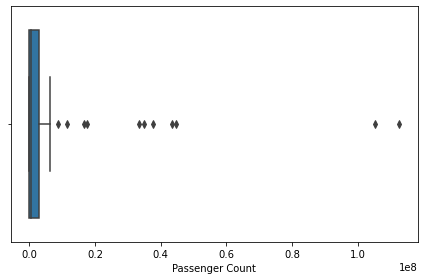

In [15]:
sns.boxplot(passenger_count) # Show passenger count as boxplot to see outliers
plt.tight_layout()

In [16]:
passenger_count.sort_values(ascending = False, inplace = False)

Operating Airline
United Airlines                     112640408
United Airlines - Pre 07/01/2013    105363917
SkyWest Airlines                     44582356
American Airlines                    43622387
Virgin America                       37843920
                                      ...    
Xtra Airways                              146
Ameriflight                               110
Atlas Air, Inc                             68
Boeing Company                             18
Evergreen International Airlines            4
Name: Passenger Count, Length: 89, dtype: int64

In [17]:
df_1 = airline_count + passenger_count
df_1

ABC Aerolineas S.A. de C.V. dba Interjet      15593
ATA Airlines                                 384808
Aer Lingus                                   777843
Aeromexico                                  1673180
Air Berlin                                   235215
                                             ...   
WOW Air                                      295224
WestJet Airlines                             799936
World Airways                                   788
XL Airways France                            119012
Xtra Airways                                    148
Length: 89, dtype: int64

C:\Users\fa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


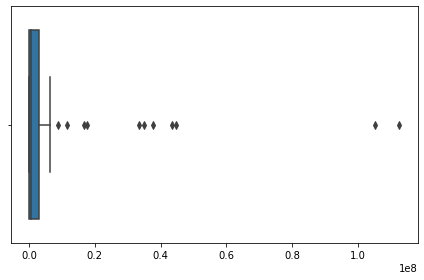

In [18]:
sns.boxplot(df_1)
plt.tight_layout()

In [19]:
df_1.sort_values(ascending = False, inplace = True)
df_1

United Airlines                     112642061
United Airlines - Pre 07/01/2013    105366071
SkyWest Airlines                     44583568
American Airlines                    43622767
Virgin America                       37844382
                                      ...    
Xtra Airways                              148
Ameriflight                               132
Atlas Air, Inc                             70
Boeing Company                             19
Evergreen International Airlines            6
Length: 89, dtype: int64

In [20]:
outliers = df_1.head(2).index.values
outliers

array(['United Airlines', 'United Airlines - Pre 07/01/2013'],
      dtype=object)

In [21]:
# Remove outliers
airline_count = airline_count.drop(outliers)
airline_count.sort_index(inplace=True)
passenger_count = passenger_count.drop(outliers)
passenger_count.sort_index(inplace = True)

In [22]:
airline_count

ABC Aerolineas S.A. de C.V. dba Interjet      8
ATA Airlines                                 44
Aer Lingus                                  152
Aeromexico                                  234
Air Berlin                                   60
                                           ... 
WOW Air                                      56
WestJet Airlines                            135
World Airways                                 3
XL Airways France                            51
Xtra Airways                                  2
Name: Operating Airline, Length: 87, dtype: int64

## Modeling - Clustering airline companies by number of flights held

In [23]:
airline_count_df=pd.DataFrame(data=airline_count,columns=['Operating Airline'])
airline_count_df.rename(columns ={'Operating Airline':'Flights Count'},inplace=True)
airline_count_df

,Flights Count
ABC Aerolineas S.A. de C.V. dba Interjet,8
ATA Airlines,44
Aer Lingus,152
Aeromexico,234
Air Berlin,60
...,...
WOW Air,56
WestJet Airlines,135
World Airways,3
XL Airways France,51


In [24]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters=no_of_cluster)
        pred = model.fit_predict(airline_count_df)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(airline_count_df,pred)
        print(f'Number of cluster {no_of_cluster}, silhouette {score}')
        allscore.append(score)
        allclusters.append(no_of_cluster)
        
#Number of clusters where silhouette score remains constant number of airlines segments should be selected
#When we look at the results, the number of airline segmentation should be 3
clust(10)

Number of cluster 2, silhouette 0.7191754852710744
Number of cluster 3, silhouette 0.7712531975112481
Number of cluster 4, silhouette 0.7033951656333725
Number of cluster 5, silhouette 0.691150427542082
Number of cluster 6, silhouette 0.6876967686645373
Number of cluster 7, silhouette 0.7216258587759875
Number of cluster 8, silhouette 0.7134392650404501
Number of cluster 9, silhouette 0.7156402248336123
Number of cluster 10, silhouette 0.6984454623938636


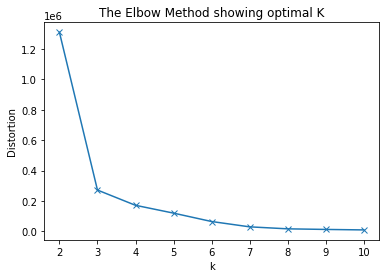

In [25]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()
#If we compare the graph to an arm, the point that looks like an elbow should be the number of airline segments.
#When we look at the chart, the number of airline segmentation should be 3

In [26]:
model = KMeans(n_clusters=3)
model = model.fit(airline_count_df)
flights_pred = model.predict(airline_count_df)
flights_pred 

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 2, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [27]:
silhouette_score(airline_count_df,flights_pred)

0.7712531975112481

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


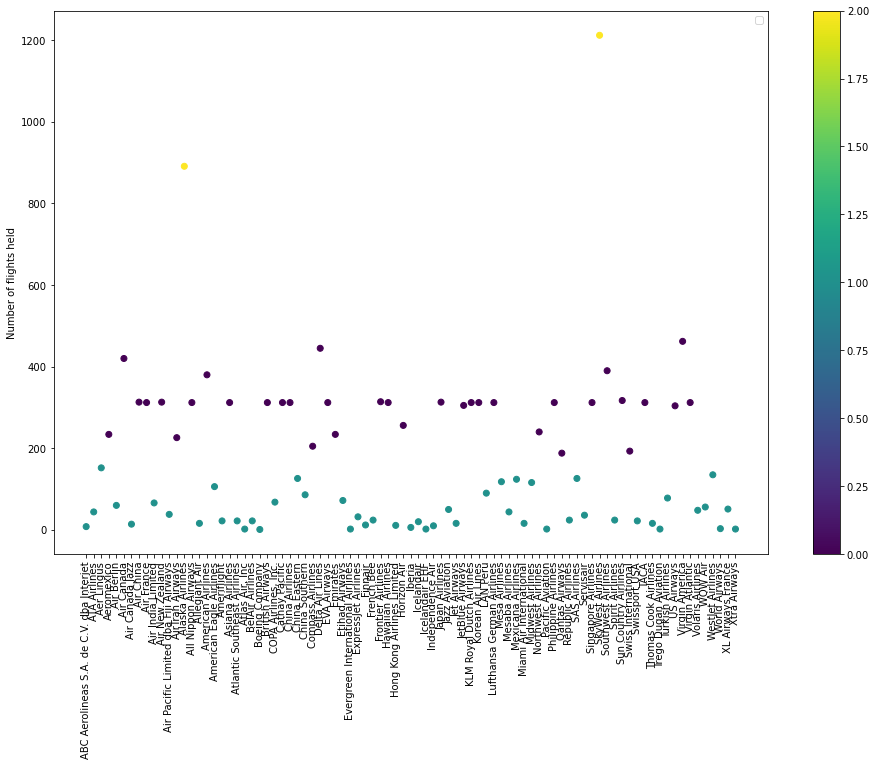

In [28]:
plt.figure(figsize=(16,10))
plt.scatter(airline_count.index,airline_count_df['Flights Count'],c=flights_pred)
plt.xticks(rotation = 90)
plt.ylabel("Number of flights held")
plt.legend()
plt.colorbar()
plt.show()

## Clustering airline companies by total number of passengers

In [29]:
passenger_count_df=pd.DataFrame(data=passenger_count,columns=['Passenger Count'])
passenger_count_df

,Passenger Count
Operating Airline,
ABC Aerolineas S.A. de C.V. dba Interjet,15585
ATA Airlines,384764
Aer Lingus,777691
Aeromexico,1672946
Air Berlin,235155
...,...
WOW Air,295168
WestJet Airlines,799801
World Airways,785


In [30]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters=no_of_cluster)
        pred = model.fit_predict(passenger_count_df)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(passenger_count_df,pred)
        print(f'Number of cluster {no_of_cluster}, silhouette {score}')
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster 2, silhouette 0.9128228241413987
Number of cluster 3, silhouette 0.825505240519285
Number of cluster 4, silhouette 0.7228955009160688
Number of cluster 5, silhouette 0.7232783594085058
Number of cluster 6, silhouette 0.7204961008638686
Number of cluster 7, silhouette 0.7358272039178945
Number of cluster 8, silhouette 0.7271041856460966
Number of cluster 9, silhouette 0.716521965411914
Number of cluster 10, silhouette 0.6899449673518766


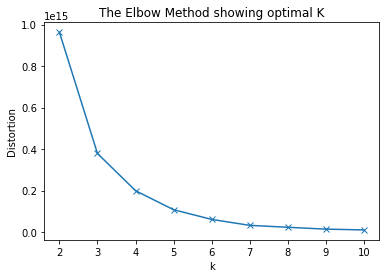

In [31]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

In [32]:
model = KMeans(n_clusters=3)
model = model.fit(passenger_count_df)
passenger_pred = model.predict(passenger_count_df)
passenger_pred

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0])

In [33]:
silhouette_score(passenger_count_df,passenger_pred)

0.825505240519285

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


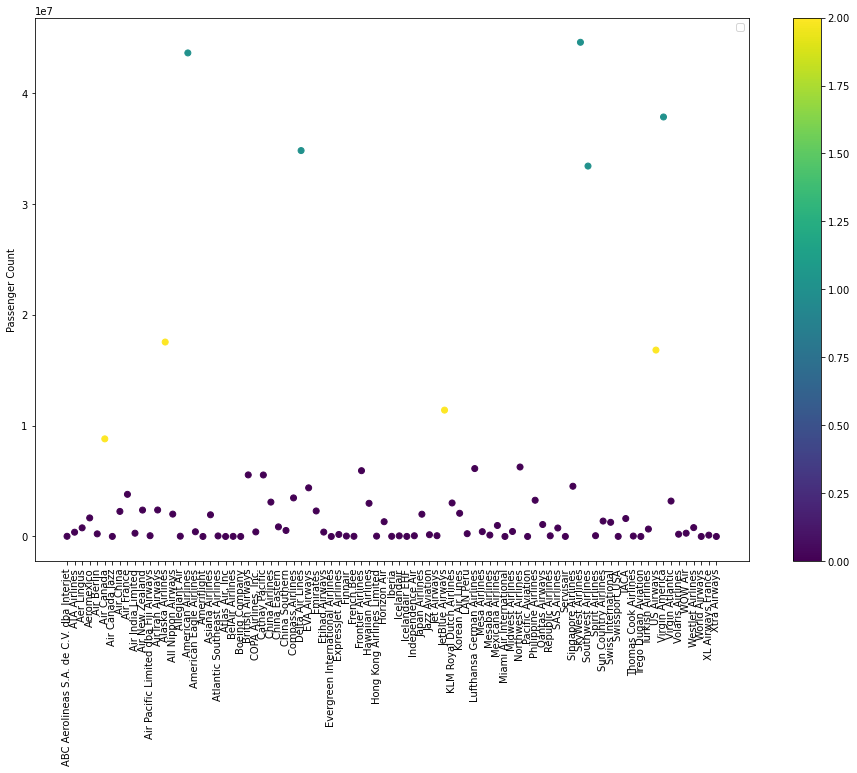

In [34]:
plt.figure(figsize=(16,10))
plt.scatter(passenger_count.index,passenger_count_df['Passenger Count'],c=passenger_pred)
plt.xticks(rotation = 90)
plt.ylabel("Passenger Count")
plt.legend()
plt.colorbar()
plt.show()

## Clustering airline companies by total number of passengers and number of flights held

In [35]:
airlines_df=pd.concat([passenger_count_df,airline_count_df],axis=1)
airlines_df

,Passenger Count,Flights Count
ABC Aerolineas S.A. de C.V. dba Interjet,15585,8
ATA Airlines,384764,44
Aer Lingus,777691,152
Aeromexico,1672946,234
Air Berlin,235155,60
...,...,...
WOW Air,295168,56
WestJet Airlines,799801,135
World Airways,785,3
XL Airways France,118961,51


In [36]:
allscore=[]
allclusters=[]
sum_of_squared_distances = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model = KMeans(n_clusters=no_of_cluster)
        pred = model.fit_predict(airlines_df)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(airlines_df,pred)
        print(f'Number of cluster {no_of_cluster}, silhouette {score}')
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster 2, silhouette 0.9128228237126467
Number of cluster 3, silhouette 0.8255052392795665
Number of cluster 4, silhouette 0.7228954972596885
Number of cluster 5, silhouette 0.7232783549305335
Number of cluster 6, silhouette 0.720496094915654
Number of cluster 7, silhouette 0.7358271967815191
Number of cluster 8, silhouette 0.7271041780978429
Number of cluster 9, silhouette 0.7165219559795252
Number of cluster 10, silhouette 0.7084660289731327


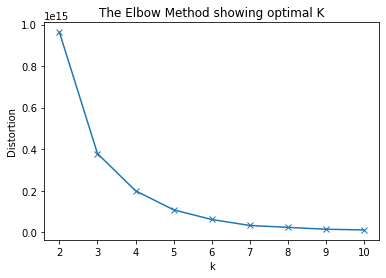

In [37]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

In [38]:
model = KMeans(n_clusters=3)
model = model.fit(airlines_df)
airlines_pred = model.predict(airlines_df)
silhouette_score(airlines_df,airlines_pred)

0.8255052392795665

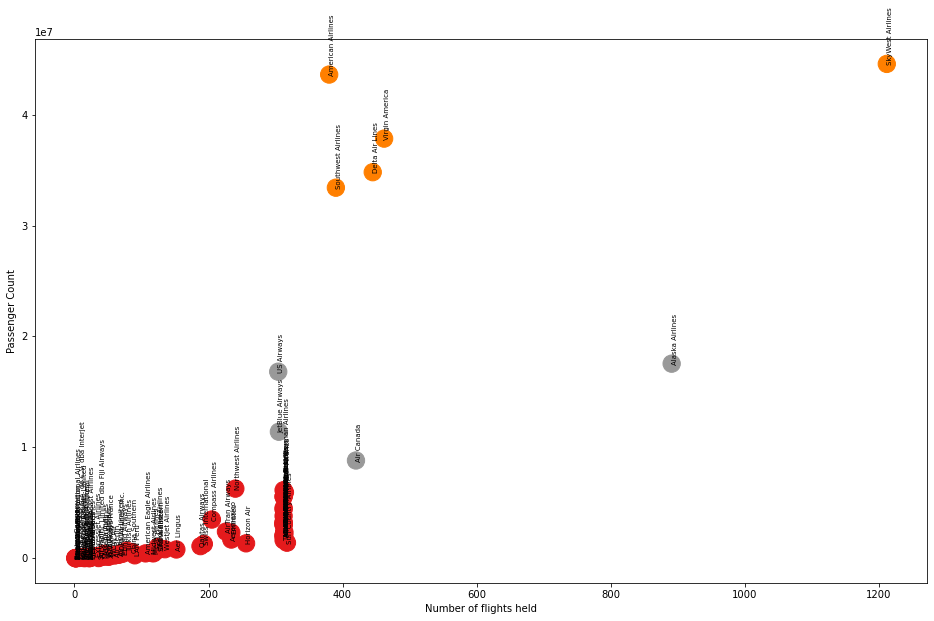

In [39]:
plt.figure(figsize=(16,10))
plt.scatter(airlines_df["Flights Count"], airlines_df["Passenger Count"], c=airlines_pred, s=300, cmap='Set1')
plt.xlabel("Number of flights held")
plt.ylabel("Passenger Count")
for i, txt in enumerate(airline_count.index.values):
    plt.annotate(txt, (airline_count[i], passenger_count[i]), size = 7, rotation = 90)
plt.show()